In [23]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 



In [24]:
df = pd.read_csv('homeprices_banglore.csv')
df.head(10)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
sx = MinMaxScaler()
sy = MinMaxScaler()

X_scaled = sx.fit_transform(df.drop('price', axis='columns'))
print(X_scaled.shape)
X_scaled


(20, 2)


array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [27]:
y_scaled = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
print(y_scaled.shape)
y_scaled

(20, 1)


array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [28]:
np.ones(shape=(X_scaled.shape[1]))

array([1., 1.])

In [29]:
def batch_gradient_descent(X, y_true,epochs,  lr= 0.05):
    w = np.ones(shape=(X.shape[1]))
    bias = 0 
    n = X.shape[0]

    cost_list = []
    epochs_list = []

    for i in range(epochs):
        y_pred = np.dot(w, X.T) + bias 

        dw = -(2/n)* (X.T.dot(y_true - y_pred))
        db = -(2/n)*np.sum(y_true - y_pred)

        w = w - lr * dw 
        bias = bias - lr * db 

        cost = np.mean(np.square(y_true-y_pred))

        if i%5 == 0:
            cost_list.append(cost)
            epochs_list.append(i)

    return w, bias,cost,  cost_list, epochs_list






    

In [30]:
w, bias ,cost,  cost_list, epochs_list = batch_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],), epochs=1500)
w, bias, cost

(array([0.8057679 , 0.35152545]), -0.10393691877543858, 0.0031500048555217577)

<function matplotlib.pyplot.show(close=None, block=None)>

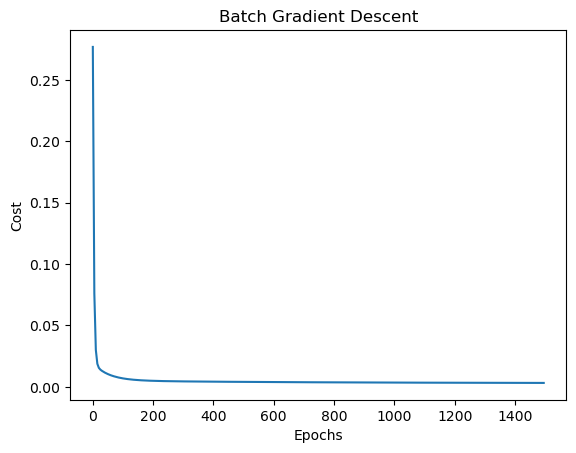

In [31]:
plt.plot(epochs_list, cost_list)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Batch Gradient Descent')
plt.show

In [32]:
def predict(area, bedrooms, w, bias):
    X_scaled = sx.transform([[area, bedrooms]])[0]
    price_scaled = w[0] * X_scaled[0] + w[1] * X_scaled[1]

    return sy.inverse_transform([[price_scaled]])[0][0]

In [33]:
predict(1200, 2, w, bias)

/home/siddharth/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


58.86793791543603

In [34]:
import random 
random.randint(0, 5)

4

In [35]:
def stochastic_gradient_descent(X, y_true,epochs,  lr= 0.05):
    w = np.ones(shape=(X.shape[1]))
    bias = 0 
    n = X.shape[0]

    cost_list = []
    epochs_list = []

    for i in range(epochs):
        random_index = random.randint(0, n - 1)
        x_rand = X[random_index]
        y_rand = y_true[random_index]

        y_pred = np.dot(w, x_rand.T) + bias 

        dw = -(2/n)* (x_rand.T.dot(y_rand - y_pred))
        db = -(2/n)*np.sum(y_rand - y_pred)

        w = w - lr * dw 
        bias = bias - lr * db 

        cost = np.mean(np.square(y_rand-y_pred))

        if i%100 == 0:
            cost_list.append(cost)
            epochs_list.append(i)

    return w, bias,cost,  cost_list, epochs_list




In [36]:
w_sgd, b_sgd, cost_sgd , cost_list_sgd, epochs_list_sgd = stochastic_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0]), epochs=10000)

In [37]:
w_sgd, b_sgd, cost_sgd

(array([0.68649405, 0.51438285]), -0.13798962211929341, 0.00021158735503978116)

In [38]:
w, bias, cost

(array([0.8057679 , 0.35152545]), -0.10393691877543858, 0.0031500048555217577)

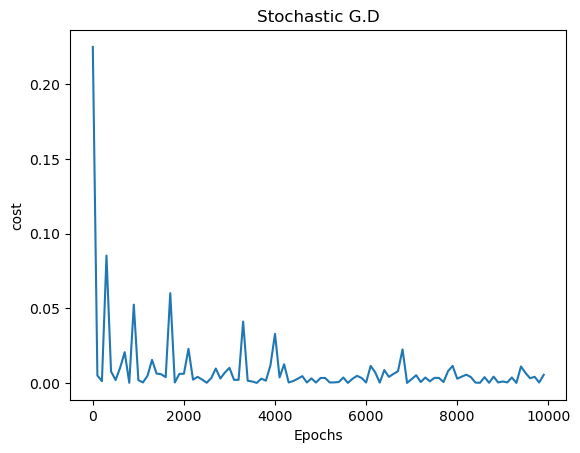

In [39]:
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Stochastic G.D')
plt.plot(epochs_list_sgd, cost_list_sgd)

In [40]:
predict(1200, 2, w_sgd, b_sgd)

/home/siddharth/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


62.14341379888134

In [44]:
def mini_batch_gradient_descent(X, y_true,epochs,  lr= 0.05, batch_size = 8):
    w = np.ones(shape=(X.shape[1]))
    bias = 0 
    n = X.shape[0]

    cost_list = []
    epochs_list = []

    if batch_size > n:
        batch_size = n  

    num_batches = n / batch_size

    for i in range(epochs):
        random_indices = np.random.permutation(n)
        X_temp = X[ random_indices ]
        y_temp = y_true[random_indices]


        for j in range(0, n, batch_size):
            Xj = X_temp[j:j+batch_size]
            yj = y_temp[j:j+batch_size]
            y_pred = np.dot(w, Xj.T) + bias 

            dw = -(2/len(Xj))* (Xj.T.dot(yj - y_pred))
            db = -(2/len(Xj))*np.sum(yj - y_pred)

            w = w - lr * dw 
            bias = bias - lr * db 

            cost = np.mean(np.square(yj-y_pred))

            if i%10 == 0:
                cost_list.append(cost)
                epochs_list.append(i)

    return w, bias,cost,  cost_list, epochs_list




In [51]:
w_mini, b_mini, cost_mini, cost_list_mini, epochs_list_mini = mini_batch_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0]), 200, batch_size= 2)

In [52]:
w_mini, b_mini, cost_mini

(array([0.84207141, 0.30114701]), -0.09742058587800834, 0.0015978329326753256)

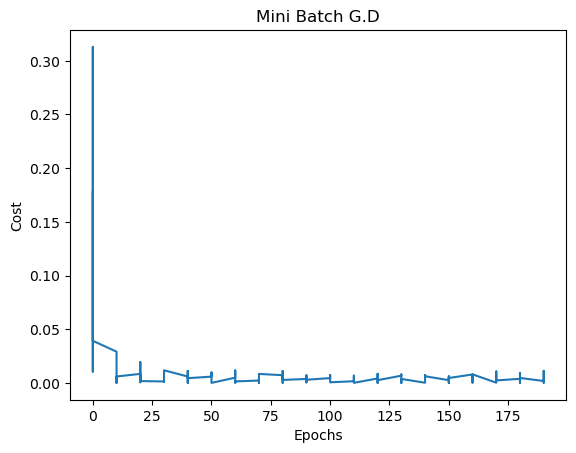

In [53]:
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Mini Batch G.D')
plt.plot(epochs_list_mini, cost_list_mini)